In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
##import plotly.plotly as py

### sampling with transaction_csv 

#### dataframe 인덱싱 

1) column 불러오기 
    dataframe["columnnames"]

In [18]:
transaction_all = pd.read_csv("transcation_all.csv")

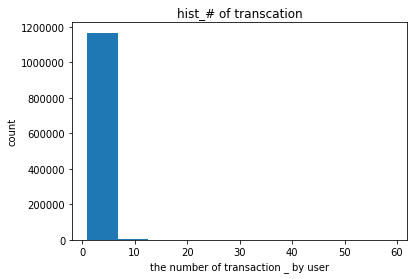

In [19]:
## coount_sum으로 도수 분포표 만들기

# 1. 일단 count_sum으로 정렬하기
transaction_all = transaction_all.sort_values(by = "count_sum")
#transaction_all["count_sum"]
plt.hist(transaction_all["count_sum"])
plt.title("hist_# of transcation")
plt.xlabel("the number of transaction _ by user")
plt.ylabel("count")

#flg = plt.gcf()
#plot_url = py.plt_mpl(flg, filename = "mlp")

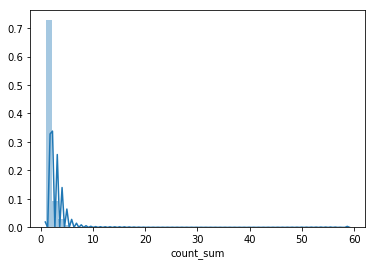

In [21]:
sns.distplot(transaction_all["count_sum"])

In [50]:
fst_q= np.percentile(transaction_all["count_sum"],[0,25])
snd_q = np.percentile(transaction_all["count_sum"],[25,50])
trd_q = np.percentile(transaction_all["count_sum"],[50,75])
fth_q = np.percentile(transaction_all["count_sum"],[75,100])

### dataframe 자제에서 사분위수로 그룹 나누기?

#fst_df = transaction_all.quantile(.25)
#fst_df

SyntaxError: invalid syntax (<ipython-input-50-3e7f3e481bb1>, line 1)

### np 이용하지 말고 dataframe indexing 조건문으로 끄집어내기

In [97]:
#fst_df = transaction_all[transaction_all["count_sum"].quantile(0) < transaction_all["count_sum"].quantile(.25)]

In [60]:
transaction_all["count_sum"].quantile(0)

1.0

In [59]:
first = transaction_all.groupby("msno")["count_sum"].quantile(.25)

KeyboardInterrupt: 

In [62]:
transaction_all.count_sum.quantile(0.25)

1.0

In [77]:
## 반복문 처리를 위해 array 로 처리

quantile_data = transaction_all[["msno","count_sum"]]

quantile_array = quantile_data.values


# 반복문 처리하기

#quantile_array[0][1]

quantile_1 = round(len(quantile_array) * 0.25) 
quantile_2 = round(len(quantile_array) * 0.5)
quantile_3 = round(len(quantile_array) * 0.75)
quantile_4 = round(len(quantile_array) * 1)

#print(quantile_1,quantile_2,quantile_3,quantile_4)
#quantile_4 - (quantile_2 - quantile_1 + quantile_3 - quantile_2 + quantile_4 - quantile_3 + quantile_1)

0

In [79]:
group_1 = []
group_2 = [] 
group_3 = []
group_4 = []

for num in range(len(quantile_array)):
    if num < quantile_1 :
        group_1.append(quantile_array[num])
    elif num < quantile_2 :
        group_2.append(quantile_array[num])
    elif num < quantile_3 :
        group_3.append(quantile_array[num])
    else : 
        group_4.append(quantile_array[num])



In [83]:
print(len(group_1),len(group_2),len(group_3),len(group_4))
print(len(group_1)+len(group_2)+len(group_3)+len(group_4)- len(quantile_array))

292697 292697 292698 292697
0


### churn 데이터 불러오기 

In [92]:
churn_v2 = pd.read_csv("D:/Users/Kwon/Desktop/DATABASE/kkbox-churn-prediction-challenge/first/train_v2.csv/data/churn_comp_refresh/train_v2.csv")
churn_v1 = pd.read_csv("D:/Users/Kwon/Desktop/DATABASE/kkbox-churn-prediction-challenge/train.csv/train.csv")

In [127]:
ch_count_v1 = pd.DataFrame(churn_v1["is_churn"].value_counts())
ch_count_v2 = pd.DataFrame(churn_v2["is_churn"].value_counts())


#x = len(ch_count_v1[0])

#x_v1 = ch_count_v1.loc[0] + ch_count_v1.loc[1]
#y_v1 = [ch_count_v1["is_churn"][0],ch_count_v1["is_churn"][1]]


#plt.hist(churn_v1["is_churn"])
#sns.distplot(churn_v1["is_churn"])

In [144]:
churn_all =churn_v1.append(churn_v2)
len(churn_all),len(churn_v1),len(churn_v2)
ch_groupby = churn_all.groupby("msno").aggregate("mean")
ch_groupby
#ch_groupby = churn_all.groupby(by = "msno").aggregate
len(ch_groupby)

1082190

In [146]:
ch_groupby["is_churn"].value_counts()
### 0.5 가 나온 경우는 is_churn 이 바뀐 경우이다. 이경우는 중요한 outlier 라
## 생각되기 때문에 ( = 영양점 ) 일단 제외시키고 데이터를 돌린다.

0.0    942441
1.0     93759
0.5     45990
Name: is_churn, dtype: int64

In [214]:
#ch_g_array = ch_groupby.values
#len(ch_g_array)
de_1 = ch_groupby[ch_groupby["is_churn"] == 0.5].index.values
ch_g_same = ch_groupby.drop(de_1,axis = 0)
ch_g_same["is_churn"].value_counts()
#ch_g_same

0.0    942441
1.0     93759
Name: is_churn, dtype: int64

###### array 에서 특정 값을 index( 위치 )로 지우는 법

array1 = np.array([1,2,3,4,5,6,8,8,9])

array1 = np.delete(array1,[0,8])


In [215]:
gd_1 = pd.DataFrame(group_1,columns = ["msno","count_sum"])
gd_2 = pd.DataFrame(group_2,columns = ["msno","count_sum"])
gd_3 = pd.DataFrame(group_3,columns = ["msno","count_sum"])
gd_4 = pd.DataFrame(group_4,columns = ["msno","count_sum"])

##### 각 그룹에 있는 유저들 churn data merge 하기

### ch_g_same 에 있는 index를 column으로 바꾸기
ch_g_same.reset_index(level= 0,inplace = True)


In [219]:
g1 = pd.merge(left = gd_1, right = ch_g_same,on=["msno"], how = "inner")
g2 = pd.merge(left = gd_2, right = ch_g_same,on=["msno"], how = "inner")
g3 = pd.merge(left = gd_3, right = ch_g_same,on=["msno"], how = "inner")
g4 = pd.merge(left = gd_1, right = ch_g_same,on=["msno"], how = "inner")
 

In [223]:
len(quantile_array)-len(g1)-len(g2)-len(g3)-len(g4)
#### 기존의 그릅에서 373,093 개가 누락됨
###  is_churn = 0.5로 지운 수는 45990 뿐이다.

373093

In [226]:
#############3 이제 각 그룹에서 250 명씩만 sameling 하면 된다 . churn 비율 1:1 로

In [245]:
g1_0 = g1[g1["is_churn"] == 0]["msno"]
g1_1 = g1[g1["is_churn"] == 1]["msno"]

g2_0 = g2[g2["is_churn"] == 0]["msno"]
g2_1 = g2[g2["is_churn"] == 1]["msno"]

g3_0 = g3[g3["is_churn"] == 0]["msno"]
g3_1 = g3[g3["is_churn"] == 1]["msno"]

g4_0 = g4[g4["is_churn"] == 0]["msno"]
g4_1 = g4[g4["is_churn"] == 1]["msno"]



0         YsXwIShInkLWmLCl38a7hT7QyuhGkRuMeNloTUSBp5s=
1         YsYF8ns6BogaWMJ4V7QE+q/m/i3ASXZwtShvZxF1iV0=
2         YsYbVY/+69rnwOs6k11AZyVyHlEp7RbkvFezPTCxeMc=
3         YsaXD7R8umecRTnN3hkMwtlz7egG+wlNCf+D8A/udXk=
4         Ysd+JAlEGHt/a6GSwszsXfokud6AzGOWrlM4rUPI8mY=
5         YsdVaoGrSc14Y7V6DdfjubE8ROHCdqOgXQDb7iECwOQ=
6         Yse38YbPbGx1H4lqmuiePPN6a3VyB2Ypjk+FhM+u7UM=
7         YseWgHNpCLXYwuWkuEIlfVFfgfhRMUrCURkfGWqtZkw=
8         YsetgorOY3srRnj/INden7XZNd22YTJQ7LeQoOgUBiw=
9         Ysf/XBDC0wEvHg4kTHHF5wtzjGD/Zpeva7gL6XEbddM=
10        YsfBgxXoNSqiHGTutHHd+Uyc3SzpUeM7xHb2840q0W4=
11        YsgP5gYfqAaS/htbS55m9v4cHV2K3h7eCCtRRP1dNYU=
12        YsgWK7HhtgqNMxBnebbeCOtxzmR3ozgHy2bLq2mTJ1M=
13        YsgqGNwT0FRnz43CDHwBGjZZo8sQQFsiQ64TcullUvc=
14        YshaQB6VkGlBJvL0F7bWeu+8yMdHk6+wM6EUimRcp8o=
15        YsiEfn++fbgD6G8eUnnxXTSiKgpQgW6p4Mm7MdQniFU=
16        YsXMgwzn3TtoHKtP799BbXuzrwPPgy0x8IzRpWPyhS8=
17        YsWHM8HfzdtvlqVIA+gFxfU2jonXbsckSh6F3IF6VRU=
18        

In [247]:
rand_g1_0 = np.random.choice(g1_0,125)
rand_g1_1 = np.random.choice(g1_1,125)

rand_g2_0 = np.random.choice(g2_0,125)
rand_g2_1 = np.random.choice(g2_1,125)

rand_g3_0 = np.random.choice(g3_0,125)
rand_g3_1 = np.random.choice(g3_1,125)

rand_g4_0 = np.random.choice(g4_0,125)
rand_g4_1 = np.random.choice(g4_1,125)



In [253]:
churn_all["is_churn"].value_counts("Nah")

0    0.923213
1    0.076787
Name: is_churn, dtype: float64

In [254]:
len(churn_all),len(ch_groupby)

(1963891, 1082190)